# Image Classification Demo: Handwritten Digits 
## Machine Learning and Neural Networks with the MNIST Dataset
Author: Adam J. Vogt (Aug. 2017)

---
The classic [MNIST Dataset of Handwritten Digits](https://en.wikipedia.org/wiki/MNIST_database) is used to train, tune, and compare various classification algorithms.  In particular, demonstrations of various Neural Network architectures are used to compare and improve classification performance.  Because of the size of the dataset relative to the performance of a personal laptop, alternative optimization algorithms are applied to improve speed.

#### Algorithms:
* Naive Bayes
* Logistic Regression (Multinomial Softmax Regression)
* Decision Tree
* Random Forest
* Multilayer Perceptron (Single & Multiple Hidden Layers)
* Convolutional Neural Network

#### Packages:
* [Scikit-Learn](http://scikit-learn.org/stable/)
* [Keras](https://keras.io/) (with [TensorFlow](https://www.tensorflow.org/) backend)

#### Contents
1. Loading the Data
2. Classification (Basic Algorithms)
3. Classification (Neural Networks)
4. Training and Evaluating the Final Model
5. Conclusions


## 1 - Loading the Data
---
### 1.1 - Dataset Information
The dataset is downloaded from the [MNIST Database of handwritten digits](http://yann.lecun.com/exdb/mnist/).

The database includes a set of 60,000 training and 10,000 test images with labels in the range [0, 9].  The images are 28x28 pixels with black and white values in the range [0, 255].

### 1.2 - Importing the Data
A built-in TensorFlow tutorial library is used to download, extract and import the data.  The library splits the data into training (55,000), validation (5,000), and test (10,000) sets.  Assuming that the test set corresponds the originally defined test set from the MNIST Database, the training and validation sets are combined into the originally defined training set.  It is important to note that the pixel values have been normalized to the range [0, 1].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#--- Importing Data ---
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
X_train = np.concatenate((mnist.train.images,
                          mnist.validation.images))
y_train = np.concatenate((mnist.train.labels,
                          mnist.validation.labels))
X_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### 1.3 - Exploring the Dataset
Here various aspects of the Dataset are explored using special functions in **plot_utils.py** , including:
* Dataset size and shape
* Example images and labels
* The distribution of pixel intensities
* The distribution of image labels
* Average and standard deviation intensities per pixel for each digit

#### Dataset Shape

In [2]:
# Data Shape
print('Training Data \nRows: %d, columns: %d, labels: %d \n'
      % (X_train.shape[0], X_train.shape[1], 
         y_train.shape[0]))
print('Test Data \nRows: %d, columns: %d, labels: %d'
      % (X_test.shape[0], X_test.shape[1],
         y_test.shape[0]))

Training Data 
Rows: 60000, columns: 784, labels: 60000 

Test Data 
Rows: 10000, columns: 784, labels: 10000


#### Example Images

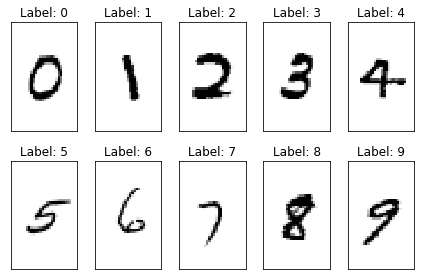

In [3]:
# Plotting random set of example images
from libs.plot_utils import plot_examples
plot_examples(imgs=X_train, labels=y_train)

Shown above are randomly chosen images examples, one for each digit in dataset.  Respective labels are identified above the image.

#### Distribution of Pixel Values

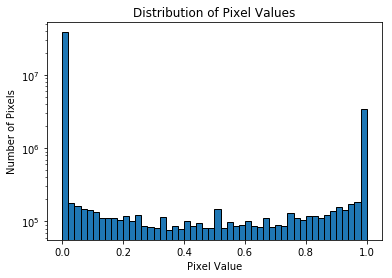

In [4]:
# Plotting pixel value distribution
from libs.plot_utils import pixel_dist
pixel_dist(imgs=X_train)

As seen in the log plot above, the distribution of pixel values is appears roughly binary.  Most values are either close to a value of 0 or close to (normalized) value of 1.

#### Distribution of Labels

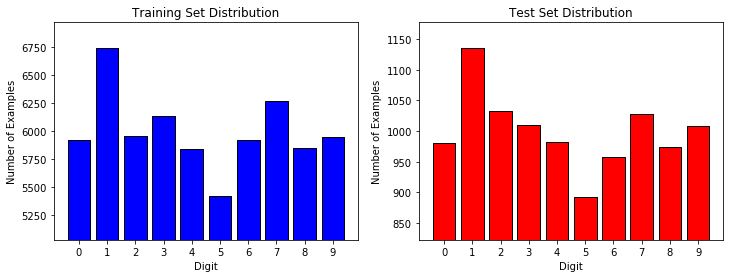

In [5]:
# Plotting distribution of Digit labels
from libs.plot_utils import label_dist
label_dist(labels_train=y_train, labels_test=y_test)

Shown above, the splitting between training (left) and test (right) sets appear to have been stratified based on label.  While some labels appear more often than others, the dataset is roughly evenly distributed across the labels.  Note the different scales of the y axes.

#### Average and Standard Deviation for Pixel Intensity

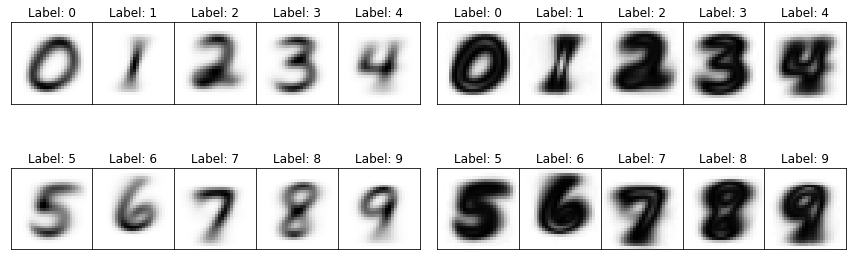

In [6]:
# Plotting average and standard deviation of pixels
from libs.plot_utils import plot_statRep
plot_statRep(imgs=X_train, labels=y_train)

Averages (left) and standard deviations (right) for each each pixel for each digit show that most digits appear in roughly similar shapes, positions, and rotations relative to the image frame.

### 1.4 - Training and Validation Sets
New training and validation splits are created to in order to compare performance and choose among possible classificaiton algorithms.  The original training set (60,000) will be split into new training (50,000) and validation (10,000) sets.

In [7]:
#- Training & Validation splits
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=10000, random_state=33)

## 2 - Classifcation (Basic Algorithms)
---
A selection of "standard" classification algorithms are training and validated to predict performance on the final test set.  Algorithms are implemented from the Scikit-Learn package.  Tuning parameters have been choosen ahead of time from a cursory grid search of tuning parameters.  An appendix notebook is planned for a more in-depth discussion of parameter tuning and selection for various algorithms.  Performance is also evaluted through display of the confusion matrix and examples of correctly and incorrectly classified images.  Plots are produced by functions in **plot_utils.py**.

In [8]:
from sklearn.metrics import accuracy_score
from libs.plot_utils import plot_confusion_matrix
from libs.plot_utils import plot_pred_examples

scores = []

### 2.1 - Naive Bayes
The [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) is implemented because of its speed and simplicity.  However, the algorithm is unlikely to perform well in this scenario, especially since there is no reason to believe the pixel intesity distribution is Gaussian in nature.

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

Training Accuracy: 0.566
Validation Accuracy: 0.557


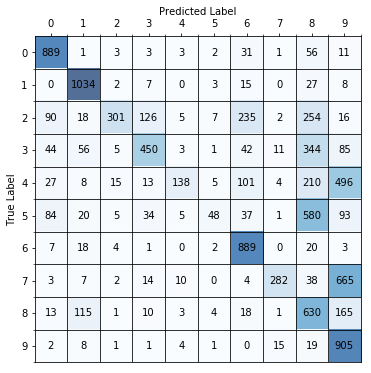

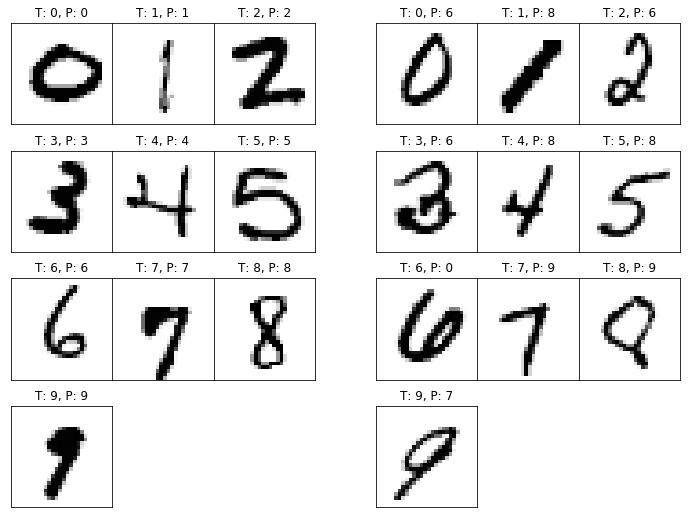

In [10]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = nb.predict(X_train)
y_val_pred = nb.predict(X_val)
y_test_pred = nb.predict(X_test)
scores.append(['Naive Bayes', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

As expected, Gaussian Naive Bayes performs poorly on this dataset, with a validation accuracy of 55.7%.  The first plot shows the confusion matrix for predictions of the validaiton dataset.  The model has a particular difficult time in correctly classifying images of "2", "4", "5", and "7" and over-predicts labels of "8" and "9".  The second plot displays examples of correctly (left) and incorrectly (right) classified images.  "T" represents the true label while "P" represents the predicted label.  Many of the misclassified examples do not appear to be particularly difficult examples.

### 2.2 - Logistic Regression
[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) is a commonly used linear classifier that works well under the assumption of near linearly-separable classes.  Because the dataset is quite large, use of the stochastic gradient descent methods become necessary.  Here, the [SAGA](https://arxiv.org/abs/1407.0202) optimizer is used, and the regularization (C = 1.0, L2 penalty) and iteration (max_iter = 25) parameters have been chosen from a cursory grid search of tuning parameters.  Multinomial regression showed a marginally higher validation accuracy than "one-vs-rest" regression.

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, random_state=33,
                        solver='saga',max_iter=25,
                        multi_class='multinomial',
                        penalty='l2')
lr.fit(X_train, y_train)

C:\Users\Mickey Vogt\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=25, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=33, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

Training Accuracy: 0.936
Validation Accuracy: 0.924


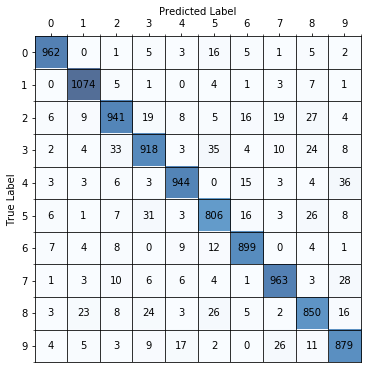

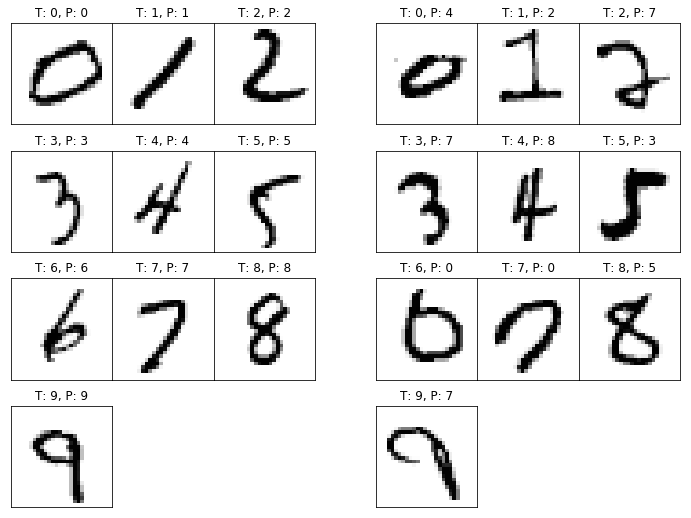

In [12]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)
scores.append(['Logistic Regression (Regularized)', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

The multinomial, regularized Logistic Regression model improves considerably on the Naive Bayes model with a validation accuracy of 92.4%.  As seen in the confusion matrix, no particular digit is greatly misclassified, and the misclassified examples (bottom right) represent some particularly difficult examples.

### 2.3 - Decision Tree
Before perfroming another popular classifier, Random Forest, a simple [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) model is trained for comparison.  Simple Decision Trees can be trained quickly, but their greedy, top-down method can prevent them from picking up on more nuanced features in the dataset.

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training Accuracy: 1.000
Validation Accuracy: 0.883


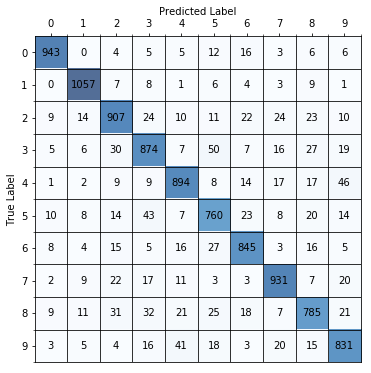

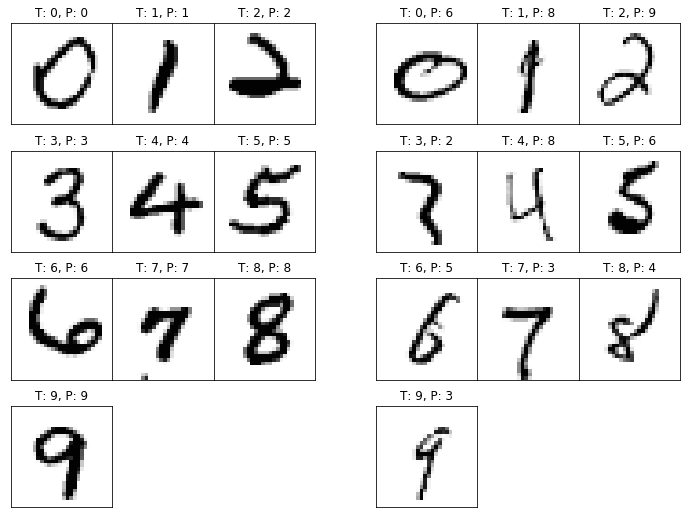

In [14]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = tree.predict(X_train)
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)
scores.append(['Decision Tree', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

The single decision tree performs much better than Naive Bayes, but underperforms relative to the linear classifier (Logistic Regression).  The decision tree overfits the training data as evidenced by the 100% training accuracy relative to the 88.3% validation accuracy.  No particular digit appears to be more or less misclassified than the others, and the example misclassifications do include a few difficult examples.

### 2.4 - Random Forest
[Random Forest](https://en.wikipedia.org/wiki/Random_forest) tends to perform well a large diversity of datasets.  Cursory parameter tuning shows that the performance of Random Forest does not improve beyond a small number of estimators (10).  However, shallow estimators (depth < 8) do not perform as well as deeper estimators for this dataset.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,
                            max_features='auto',
                            max_depth=30,
                            criterion='entropy',
                            random_state=33)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

Training Accuracy: 0.999
Validation Accuracy: 0.945


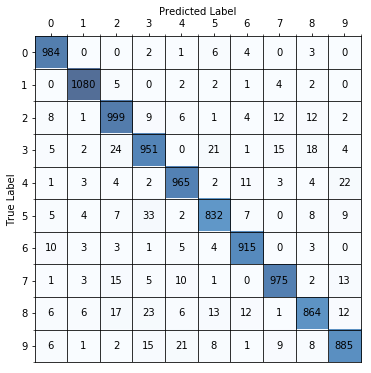

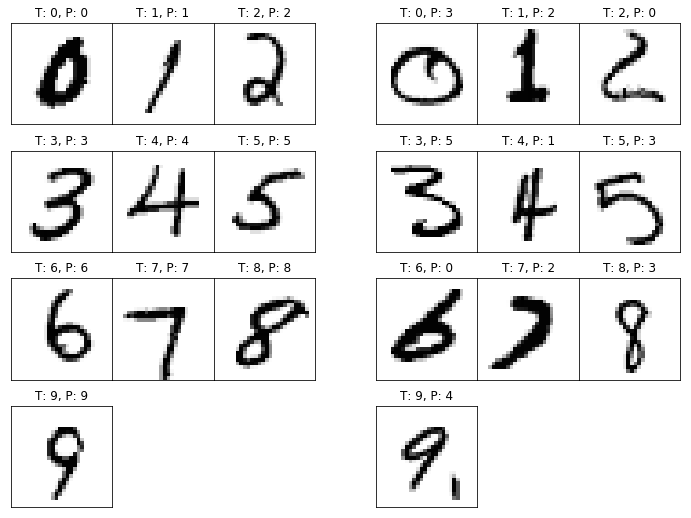

In [16]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)
scores.append(['Random Forest', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

With a 94.5% validation accuracy, the Random Forest Classifier performs quite well compared to the other "standard" algorithms, particularly in contrast to the single decision tree.  It is possible that a boosted classifier will outperform the Random Forest at the expense of computation time.

## 3 - Classification (Neural Networks)
---
For this work, Neural Network classifiers are built using the Keras library using the TensorFlow backend.  Basic Neural Networks are considered for the sake of simplicity and brevity of the demonstration.  Cursory hyperparameter, architecture, and optimization algorithm tuning was performed.  Additional work considering different architectures, tuning parameters, and regularization techniques are planned for another appendix to this notebook.  

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

# One-hot-encoding the labels
y_train_ohe = np_utils.to_categorical(y_train)

Using TensorFlow backend.


### 3.1 - Softmax Regression (Multinomial Logistic Regression)
Without hidden layers, the network directly connecting inputs to outputs with a softmax activation resembles the [Multinomial Logistic Regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) algorithm presented earlier.  The main differences include the optimizer parameters and the lack of regularization.  However, it is expected that the Softmax Regression should perform similarly to the earlier Logistic Regression.

In [18]:
# Building model
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
                units=y_train_ohe.shape[1],
                kernel_initializer='uniform',
                activation='softmax'))
sgd = SGD(lr=0.5, decay=1e-7, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])

# Fitting model
model.fit(X_train,
          y_train_ohe,
          epochs=50,
          batch_size=500,
          verbose=0,
          validation_split=0)

Training Accuracy: 0.934
Validation Accuracy: 0.917


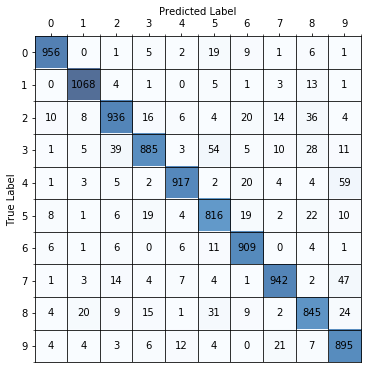

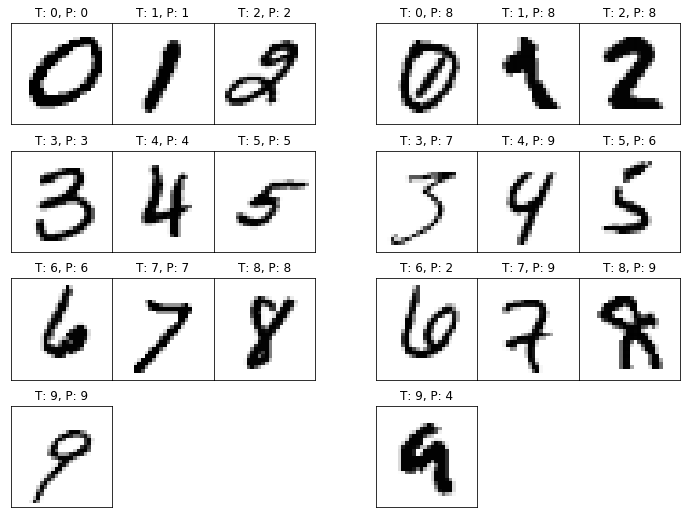

In [19]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = model.predict_classes(X_train, verbose=0)
y_val_pred = model.predict_classes(X_val, verbose=0)
y_test_pred = model.predict_classes(X_test, verbose=0)
scores.append(['Softmax Regression (Unregularized)', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

As expected, the Softmax Regression model performs similarly to the Logistic Regression model with a slightly poorer validation accuracy of 91.7%.  It is possible that tuning optimizer parameters as well as including regularization may help validation performance.

### 3.2 - Multilayer Perceptron (Single Hidden Layer)
The [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) is constructed with a single, wide (1024 unit) hidden layer.  Sigmoid activations are choosen from historical context. The number of units in the hidden layer was choosen to mimic the fully connected layer of the Convolutional Neural Network presented later.  The Adam Optimizer is chosen for improved speed and performance, and other optimization values were chosen from cursory model tuning.

In [20]:
# Building Model
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
                units=1024,
                kernel_initializer='uniform',
                activation='sigmoid'))
model.add(Dense(input_dim=1024,
                units=y_train_ohe.shape[1],
                kernel_initializer='uniform',
                activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fitting model
model.fit(X_train,
          y_train_ohe,
          epochs=35,
          batch_size=500,
          verbose=0,
          validation_split=0)

Training Accuracy: 0.998
Validation Accuracy: 0.977


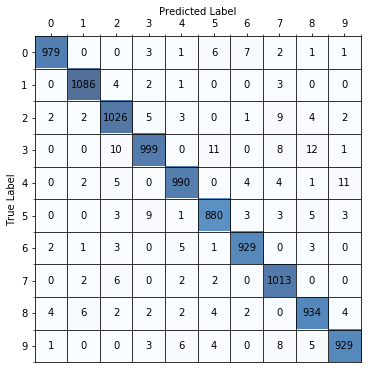

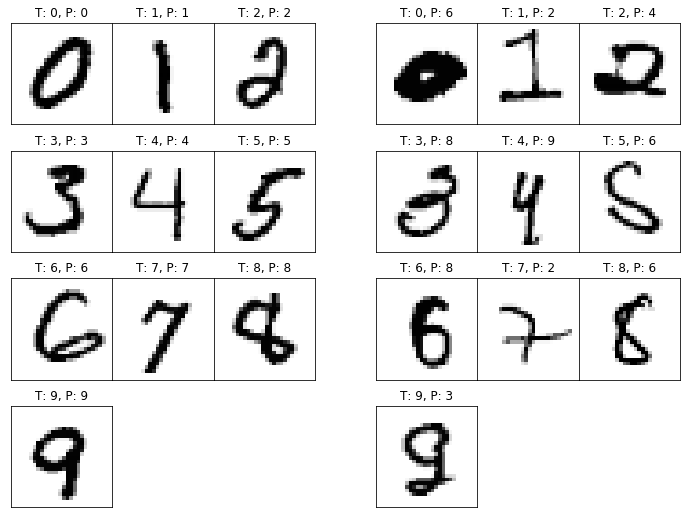

In [21]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = model.predict_classes(X_train, verbose=0)
y_val_pred = model.predict_classes(X_val, verbose=0)
y_test_pred = model.predict_classes(X_test, verbose=0)
scores.append(['MLP (Single Hidden Layer)', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

The MLP with a single, wide hidden layer clearly outperforms the "standard" classification algorithms present in Section 2. With a 97.7% validation accuracy, marginal improvement in perform will likely be difficult and costly.  It is quite interesting that a simple, single-layer neural network performs so well.

### 3.3 - MLP (Multiple Hidden Layers w/ Dropout)
To see how well a "deep" network improves upon the performance of a simple MLP, a second wide (1024 units) hidden layer is included in the model.  In order to take advantage of the number of network connections and prevent overfitting, dropout layers are included to incorporate regularization in the model.  From cursory model tuning, the dropout layers appear to provide only marginal benefit on validation accuracy.

In [22]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
                units=1024,
                kernel_initializer='uniform',
                activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(input_dim=1024,
                units=1024,
                kernel_initializer='uniform',
                activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(input_dim=1024,
                units=y_train_ohe.shape[1],
                kernel_initializer='uniform',
                activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fitting model
model.fit(X_train,
          y_train_ohe,
          epochs=40,
          batch_size=500,
          verbose=0,
          validation_split=0)

Training Accuracy: 0.999
Validation Accuracy: 0.980


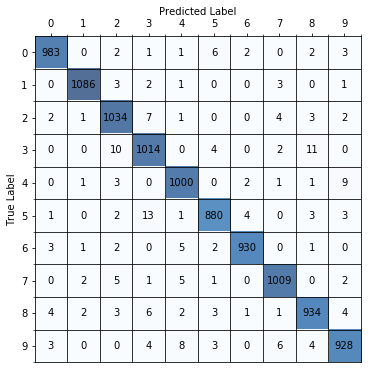

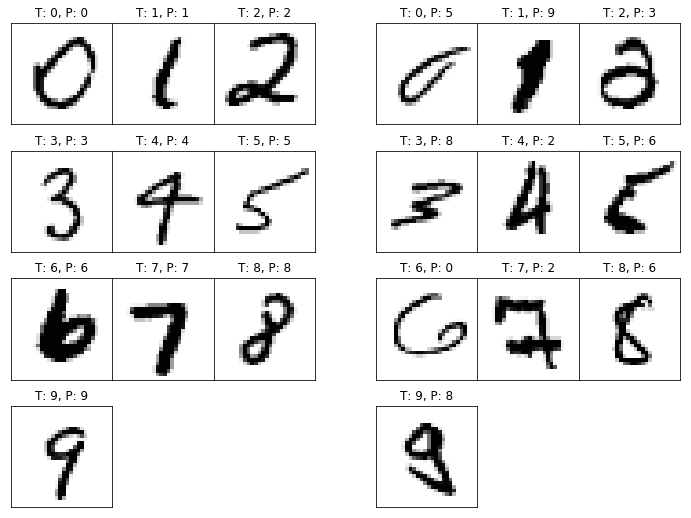

In [23]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = model.predict_classes(X_train, verbose=0)
y_val_pred = model.predict_classes(X_val, verbose=0)
y_test_pred = model.predict_classes(X_test, verbose=0)
scores.append(['MLP (Multiple Hidden Layers)', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

This model, while trained over a larger number of epochs, improves upon the single hidden layer MLP very little with a 98% validation accuracy.  It is possible that deeper, narrower network may have similar or improved performance, it is interesting to see only marginal improvement upon a single hidden layer.

### 3.4 - Convolutional Neural Network
Finally, a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) is trained using an architecture of two convolutional layers with max pooling followed by a single fully connected layer.  This architecture very closely resembles that of the model used in the TensorFlow tutorial, [Deep MNIST for Experts](https://www.tensorflow.org/get_started/mnist/pros).  The major difference is that dropout is not included in the model below.  The CNN architecture is more closely related to the models that have proven to perform the best on the MNIST Dataset and other image classification tasks.

In [24]:
# Preprocessing Inputs
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
# Build Model
model = Sequential()
model.add(Convolution2D(filters=32, 
                        kernel_size=5,
                        strides=(1, 1),
                        activation='relu', 
                        input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2),
                       padding='same'))
model.add(Convolution2D(filters=64, 
                        kernel_size=5, 
                        activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2),
                       padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

# Fitting model
model.fit(X_train_cnn,
          y_train_ohe,
          epochs=10,
          batch_size=500,
          verbose=0,
          validation_split=0)

Training Accuracy: 0.984
Validation Accuracy: 0.981


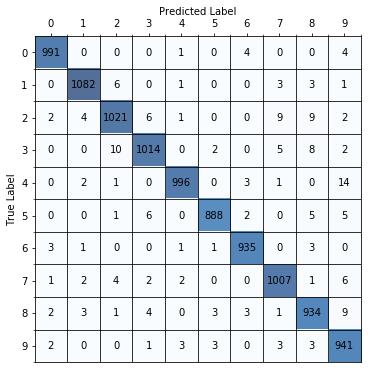

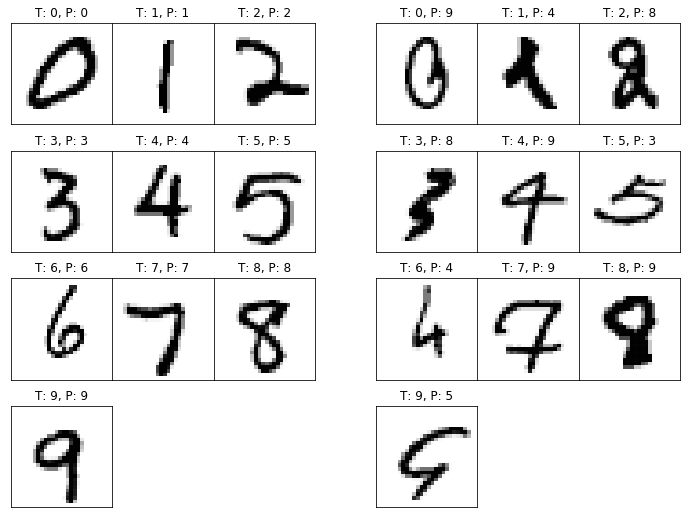

In [26]:
# Predictions for Train, Validation, and Test Sets
y_train_pred = model.predict_classes(X_train_cnn, verbose=0)
y_val_pred = model.predict_classes(X_val_cnn, verbose=0)
y_test_pred = model.predict_classes(X_test_cnn, verbose=0)
scores.append(['CNN', 
               accuracy_score(y_true=y_train,y_pred=y_train_pred), 
               accuracy_score(y_true=y_val,y_pred=y_val_pred),
               accuracy_score(y_true=y_test,y_pred=y_test_pred)])

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Validation Accuracy
print('Validation Accuracy: %.3f'
      % accuracy_score(y_true=y_val,
                       y_pred=y_val_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_val, preds=y_val_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_val, labels=y_val, preds=y_val_pred)

The CNN again only marginally outperforms the MLPs, but it reaches a 98.1% validation accuracy in less than a third of the training epochs.  

## 4 - Training and Evaluating the Final Model
---
Citing the best validation performance, the CNN model is used as the final model for application to the test dataset.

### 4.1 - Preprocessing the Data
For final model, the training and validation sets are combined for a more comprehensive training set.

In [27]:
# Combining Training and Validation Sets for final training
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

# One-hot-encoding the labels
y_train_ohe = np_utils.to_categorical(y_train)

# Preprocessing Input
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

### 4.2 - Training the Model

In [28]:
# Build Model
model = Sequential()
model.add(Convolution2D(filters=32, 
                        kernel_size=5,
                        strides=(1, 1),
                        activation='relu', 
                        input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2),
                       padding='same'))
model.add(Convolution2D(filters=64, 
                        kernel_size=5, 
                        activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2),
                       padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

# Fitting model
model.fit(X_train_cnn,
          y_train_ohe,
          epochs=10,
          batch_size=500,
          verbose=0,
          validation_split=0)

### 4.3 - Evaluating the Model

Training Accuracy: 0.984
Test Accuracy: 0.985


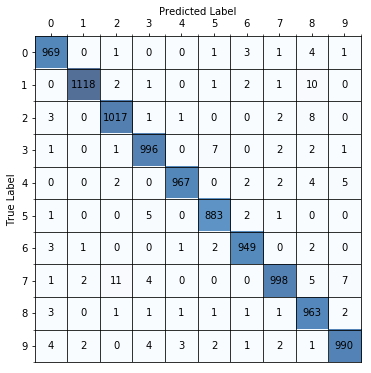

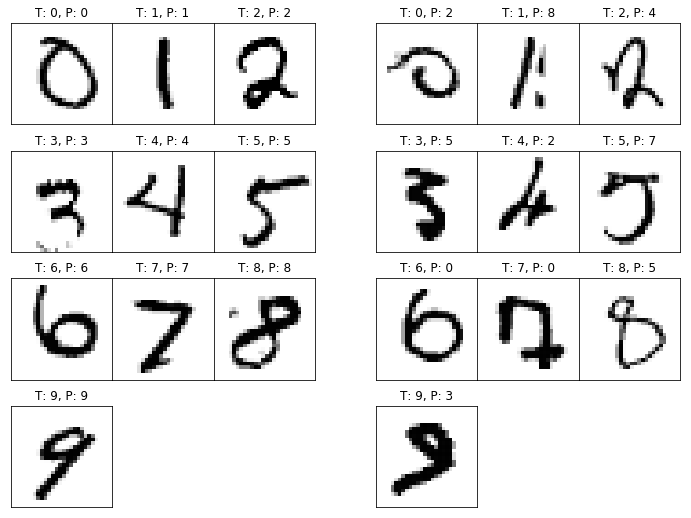

In [29]:
# Predictions for Training and Validation Sets
y_train_pred = model.predict_classes(X_train_cnn, verbose=0)
y_test_pred = model.predict_classes(X_test_cnn, verbose=0)

# Training Accuracy
print('Training Accuracy: %.3f'
      % accuracy_score(y_true=y_train,
                       y_pred=y_train_pred))

# Test Accuracy
print('Test Accuracy: %.3f'
      % accuracy_score(y_true=y_test,
                       y_pred=y_test_pred))

# Plotting confusion matrix
plot_confusion_matrix(labels=y_test, preds=y_test_pred)

# Plotting examples of correctly and incorrectly classified images
plot_pred_examples(imgs=X_test, labels=y_test, preds=y_test_pred)

The final, multi-layer CNN has a very good test accuracy performance of 98.5%.  This outperforms quite a few of the models studied and presented on the [MNIST Database](http://yann.lecun.com/exdb/mnist/) site.

## 5 - Conclusions
---

In conclusion, machine learning classification algorithms can perform quite well on classifying images of handwritten digits.  Simple linear models (Logistic Regression) can correctly classify more than 9 of every 10 images, and simpler, non-linear models (i.e. Random Forest) can improve upon the linear models.  Ultimately, neural network models perform best, even with a single, fully-connected hidden layer.  CNNs perform best for this sort of task, however, by compensating for invariances by using convolution filters across the image.  Below are the results of each algorithm on the final test set.  Please note that each of the models trained on only the smaller (50,000) training set, and not the combined training and validation (60,000) sets.

In [30]:
from operator import itemgetter
test_scores = []
for score in scores:
    test_scores.append([score[0], score[3], score[1], score[2]])
    
from IPython.display import display
import pandas as pd
df = pd.DataFrame(test_scores)
df.columns = ['Algorithm','Test Accuracy','Train Accuracy','Validation Accuracy']
display(df.set_index(keys='Algorithm').sort_values(
    by='Test Accuracy',ascending=False))

,Test Accuracy,Train Accuracy,Validation Accuracy
Algorithm,,,
CNN,0.9840,0.98416,0.9809
MLP (Multiple Hidden Layers),0.9797,0.99930,0.9798
MLP (Single Hidden Layer),0.9778,0.99810,0.9765
Random Forest,0.9474,0.99900,0.9450
Logistic Regression (Regularized),0.9260,0.93556,0.9236
Softmax Regression (Unregularized),0.9208,0.93410,0.9169
Decision Tree,0.8813,1.00000,0.8827
Naive Bayes,0.5577,0.56592,0.5566
